In [236]:
from sklearn.datasets import load_breast_cancer
import torch
import torch.nn as nn
from torcheval.metrics import BinaryAccuracy
import matplotlib.pyplot as plt

In [237]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [238]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [239]:
X = data.data
y = data.target
len(X), len(y)

(569, 569)

In [240]:
NUM_IN_FEATURES = len(X[0])
print(f'number of input features: {NUM_IN_FEATURES}')

NUM_OUT_LABELS = 1 # since it's binary
print(f'number of output label/classes: {NUM_OUT_LABELS}')

number of input features: 30
number of output label/classes: 1


In [241]:
print(f'data type: {X.dtype}')

data type: float64


In [242]:
X = torch.from_numpy(X).type(torch.float32).to(device)
y = torch.from_numpy(y).type(torch.float32).to(device)
print(f'transform data from array to tensor: {X.dtype}')

transform data from array to tensor: torch.float32


In [243]:
# split training data to 80% and testing to 20%
split = int(0.8*len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(455, 455, 114, 114)

In [244]:
# create input layer with hidden and output layer neural network
class BreastCancerBinaryNNModule(nn.Module):
    def __init__(self, num_in_features, num_out_labels, hidden_layer=512):
        super().__init__()

        self.linearLayer = nn.Sequential(
            nn.Linear(in_features = num_in_features, out_features = hidden_layer),
            nn.Linear(in_features = hidden_layer, out_features=hidden_layer),
            nn.Linear(in_features = hidden_layer, out_features=hidden_layer),
            nn.Linear(in_features = hidden_layer, out_features=num_out_labels)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor :
        return self.linearLayer(x)
    

In [245]:
model = BreastCancerBinaryNNModule(NUM_IN_FEATURES, NUM_OUT_LABELS)
print(model.state_dict)

<bound method Module.state_dict of BreastCancerBinaryNNModule(
  (linearLayer): Sequential(
    (0): Linear(in_features=30, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=1, bias=True)
  )
)>


In [246]:
# create loss function for binary classification
# BCEWithLogitsLoss is more stable than using BCELoss which requires a sigmoid activation when used. 
# when we use BCEWithLogitsLoss, there's already a sigmoid activation on it's out, therefore, the output
# is pred_logits, we need to round to get the predicted output that's needed
loss_fn = nn.BCEWithLogitsLoss() 

# optimzer: we are using Stochastic Gradient Optimization or we can usen Adam
# learning rate is a hyper parameter, we can experiement with to get better results.
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


Train-Loss: 4.613244533538818, Train-Acc: [0.4087912142276764]%, Test-Loss: 410.9993896484375, Test-Acc: [0.4815465807914734]%
Train-Loss: 0.18126723170280457, Train-Acc: [0.4087912142276764, 0.67578125]%, Test-Loss: 0.22798895835876465, Test-Acc: [0.4815465807914734, 0.696836531162262]%
Train-Loss: 0.18570587038993835, Train-Acc: [0.4087912142276764, 0.67578125, 0.7620841264724731]%, Test-Loss: 0.2538801431655884, Test-Acc: [0.4815465807914734, 0.696836531162262, 0.7691857218742371]%
Train-Loss: 0.17358531057834625, Train-Acc: [0.4087912142276764, 0.67578125, 0.7620841264724731, 0.8001850247383118]%, Test-Loss: 0.22618649899959564, Test-Acc: [0.4815465807914734, 0.696836531162262, 0.7691857218742371, 0.8053602576255798]%
Train-Loss: 0.16929350793361664, Train-Acc: [0.4087912142276764, 0.67578125, 0.7620841264724731, 0.8001850247383118, 0.8238740563392639]%, Test-Loss: 0.22705087065696716, Test-Acc: [0.4815465807914734, 0.696836531162262, 0.7691857218742371, 0.8053602576255798, 0.82671

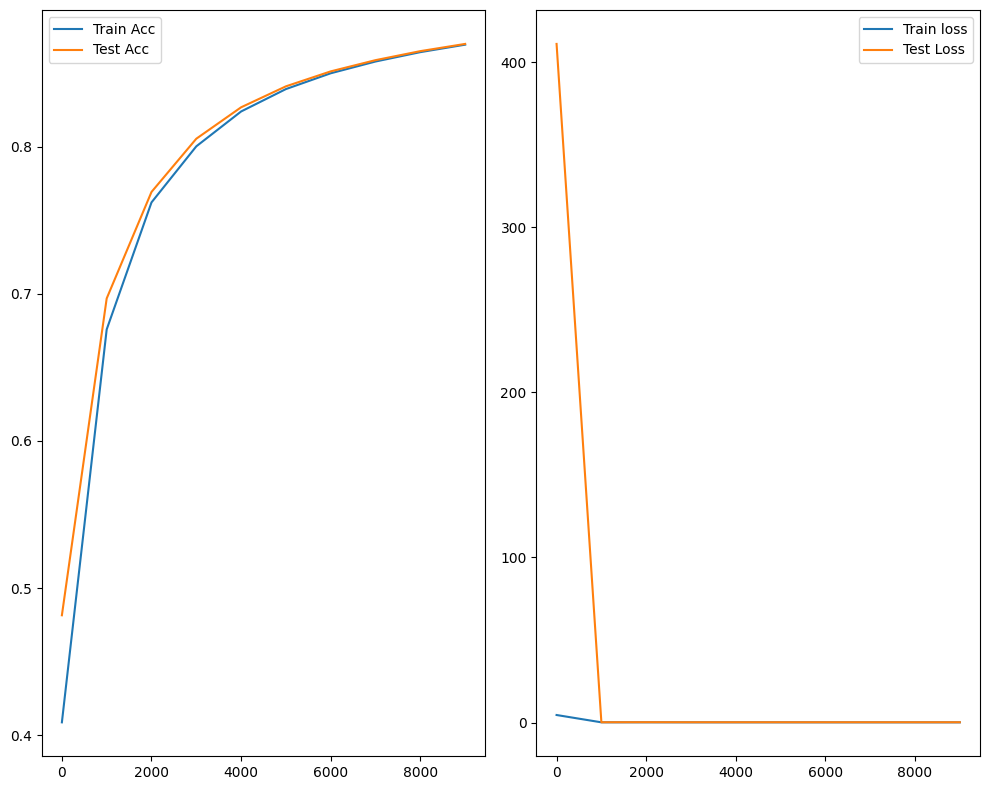

In [247]:
# train
epochs = 10000

epoch_count=[]
train_acc = []
test_acc = []

training_loss = []
testing_loss = []

metrics = BinaryAccuracy()
for epoch in range(epochs):
    # set model to training mode
    model.train()

    # do forward pass 
    train_logits = model(X_train).squeeze()
    # train prediction is torch.round(logits)
    train_y_pred = torch.round(train_logits)
    # calculate the loss
    train_loss = loss_fn(train_logits, y_train.squeeze())
    

    # set optimizer to zero gradient so previous calculated gradient does not effect current calculations
    optimizer.zero_grad()
    # do backpropagation, calculate the gradient
    train_loss.backward()
    # do the gradient descent, update weights and biases
    optimizer.step()

    ## Testing
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_loss = loss_fn(test_logits, y_test.squeeze())
        test_y_pred = torch.round(test_logits)

        if epoch % 1000 == 0:
            
            metrics.update(train_y_pred, y_train)
            train_acc.append(metrics.compute().item().detach().numpy()*100)

            metrics.update(test_y_pred, y_test)
            test_acc.append(metrics.compute().item().detach().numpy()*100)

            training_loss.append(train_loss.detach().numpy())
            testing_loss.append(test_loss.detach().numpy())
        
            epoch_count.append(epoch)

            print(f"Train-Loss: {train_loss}, Train-Acc: {train_acc}%, Test-Loss: {test_loss}, Test-Acc: {test_acc}%")
        
        
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(epoch_count, train_acc, label='Train Acc')
plt.plot(epoch_count, test_acc, label='Test Acc')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_count, training_loss, label='Train loss')
plt.plot(epoch_count, testing_loss, label='Test Loss')
plt.legend()
plt.tight_layout()
plt.show()
